In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [59]:
def potential(f1, l, pi, r):
    a, b = -1/4, 1/3
    c = -(r+pi)/(2*l)
    d = pi/l
    return a*f1**4 + b*f1**3 + c*f1**2 + d*f1

def potential2(f1, pibar, rbar): # pibar = pi/(2l), rbar = r/(2l)
    a, b = -1/4, 1/3
    c = -(pibar+rbar)
    d = 2*pibar
    return a*f1**4 + b*f1**3 + c*f1**2 + d*f1

##############################################################################################################################
def f1poly(f1, l, pi, r):
    a, b, c, d = -l, l, -r-pi, pi
    return a*f1**3 + b*f1**2 + c*f1 + d

def f1poly_sols(l, pi , r):
    a, b, c, d = -l, l, -r-pi, pi
    # step 1: delta0 and elta 1
    delta0 = b**2 - 3*a*c
    delta1 = 2*b**3 - 9*a*b*c + 27*a**2*d
    # step 2: computation of C:
    if delta0 == 0.0 and delta1 != 0.0:
        C = delta1**(1/3) # cubic_root[(delta1 + sqrt(delta1**2+0))/2]
    elif delta0 == 0.0 and delta1 == 0.0:
        C = 1.0 # so in the next step delta0/C yields 0.0 instead of NaN (0.0/0.0)
    else:
        radicand0 = delta1**2 - 4*delta0**3
        if radicand0 < 0:
            print('radicand0 < 0')
            root0 = complex(0,np.sqrt(-1*radicand0))
        else:
            root0 = complex(np.sqrt(radicand0),0)
        radicand1 = (delta1 + root0)/2 # here I'm taking the plus sign but it could be minus.......?
        # radicand1 = (delta1 - root0)/2 # 
        C = radicand1**(1/3)
    # 3: Final solution
    ksi = complex(-1, np.sqrt(3))/2
    f0_roots, f0_roots_abs = [], []
    for k in range(3):
        f0_root = -1/(3*a)*(b + ksi**k*C + delta0/(C*ksi**k))
        f0_roots.append(f0_root), f0_roots_abs.append(abs(f0_root))
    # return f0_roots_abs # I'm taking the abs to get the real part (make sure i'm not losing negative sols...)
    return [f0.real for f0 in f0_roots], [f0_roots]

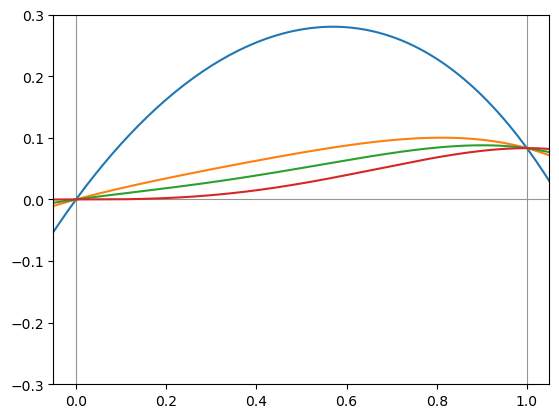

In [25]:
pi, r = 1, 1
f1s = np.arange(-0.1,1.51,0.01)

fig, ax = plt.subplots()
# for l in [1e-4, 1e-2, 1, 10, 1e4]:
ax.axhline(0.0, color='xkcd:gray', lw=0.8)
ax.axvline(0.0, color='xkcd:gray', lw=0.8)
ax.axvline(1.0, color='xkcd:gray', lw=0.8)
ax.set(xlim=(-0.05,1.05), ylim=(-0.3, 0.3))
# for l in [1, 5, 10, 1e4]:
    # pot = potential2(f1s, l, pi, r)
    # f1polyVals = f1poly(f1s, l, pi, r)
    # ax.plot(f1s, pot, label=l)
    # ax.plot(f1s, f1polyVals, label=l)

pi, r = 1, 1
for l in [1, 5, 10, 1e4]:
    pot = potential2(f1s, pibar=pi/(2*l), rbar=r/(2*l))
    ax.plot(f1s, pot, label=l)

# ax.set_yscale('symlog')

[(-0.05, 1.05), (-0.3, 0.3)]

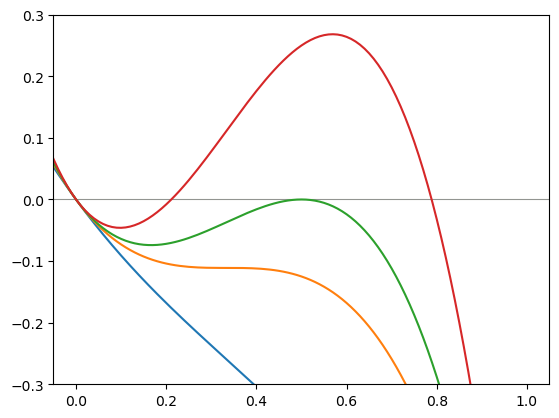

In [29]:
pi, r = 0, 1
f1s = np.arange(-0.1,1.51,0.01)

fig, ax = plt.subplots()
ax.axhline(0.0, color='xkcd:gray', lw=0.8)
for l in [1, 3, 4, 6]:
    f1polyVals = f1poly(f1s, l, pi, r)
    ax.plot(f1s, f1polyVals, label=l)
ax.set(xlim=(-0.05,1.05), ylim=(-0.3, 0.3))

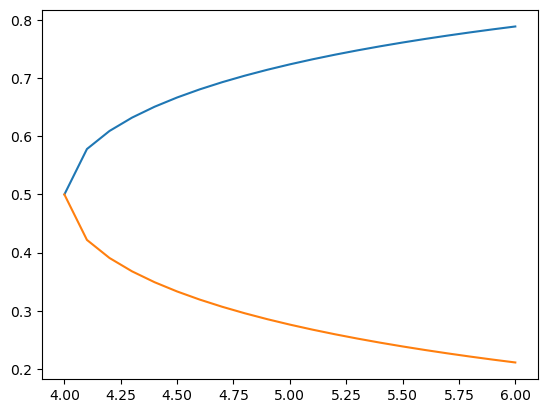

In [28]:
def solsf1_pi0(l, r):
    sqrtVal = np.sqrt(1 - 4*r/l)
    return (1+sqrtVal)/2, (1-sqrtVal)/2

ls = np.arange(4,6.1,0.1)
solplus, solmin = solsf1_pi0(ls, 1)

fig, ax = plt.subplots()
ax.plot(ls, solplus)
ax.plot(ls, solmin)


In [32]:
print(f1poly(solplus[5]+0.01, ls[5], 0, 1))
print(f1poly(solmin[5]+0.01, ls[5], 0, 1))

-0.010454499999999922
0.004995500000000042


### solutions of the 3rd degree poly pi,r != 0

In [63]:
f1poly_sols(1, 1, 1)

([0.569840290998053, 0.2150798545009735, 0.21507985450097356],
 [[(0.569840290998053+0j),
   (0.2150798545009735+1.3071412786820453j),
   (0.21507985450097356-1.3071412786820453j)]])

(1+0j)

In [57]:
ls = np.arange(0.1, 10.1, 0.1)

sols = [[], [], []]
for l in ls:
    sol = f1poly_sols(l, 1, 1)
    for i in range(3):
        sols[i].append(sol[i])

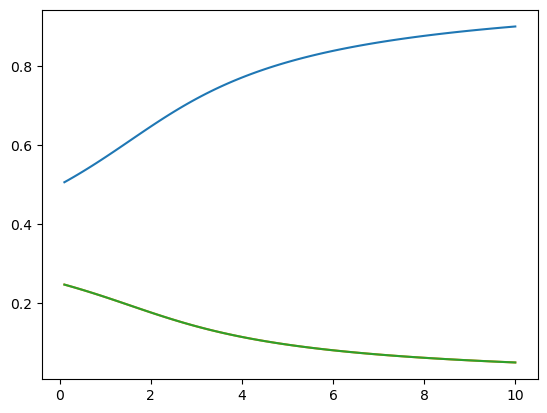

In [58]:
fig, ax = plt.subplots()

for i in range(3):
    ax.plot(ls, sols[i])

In [67]:
8e6/250

32000.0